# Diffusion Model

In [1]:
from dataset import Dataset
import matplotlib.pyplot as plt
import torch
from torch.optim import Adam
from modules import Unet, Trainer
from torch.utils.data import DataLoader

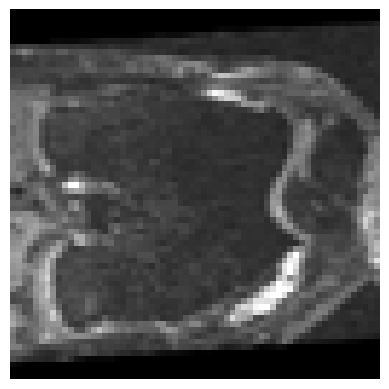

In [2]:
#Create dataset from image folder
ds = Dataset("AKOA_Analysis/", im_size=64)

#test dataset plot for 10 selections of timesteps
plt.axis('off')
image = ds.__getitem__(7)
plt.imshow((image.numpy().T + 1) * 0.5)
plt.show()

Using Device:  cuda


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

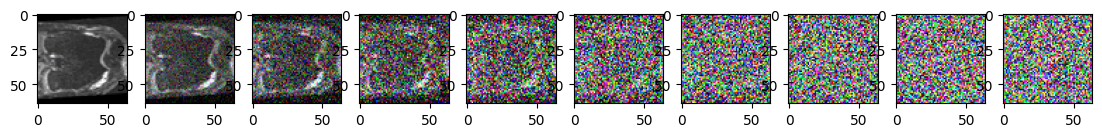

In [3]:
timesteps = 300

#Create trainer and model
model = Unet()
trainer = Trainer(model, timesteps=timesteps)

#Plot images over timesteps
image = ds.__getitem__(7)
plt.figure(figsize=(15,15))
plt.axis('off')
num_images = 10
stepsize = int(timesteps/num_images)

for idx in range(0, timesteps, stepsize):
    t = torch.Tensor([idx]).type(torch.int64)
    plt.subplot(1, num_images+1, int(idx/stepsize) + 1)
    image, noise = trainer.forward_diffusion_sample(image, t)
    
    plt.imshow((image.cpu().numpy().T + 1) * 0.5)

In [4]:
#Create dataloader
batch_size = 128
dataloader = DataLoader(ds, batch_size=batch_size, shuffle=True, drop_last=True)

#Create optimizer
optimizer = Adam(model.parameters(), lr=0.001)

#Train
epochs = 100
trainer.fit(dataloader, epochs, optimizer, batch_size)

Epoch 0 | step 000 Loss: 0.8097571134567261 
Epoch 5 | step 000 Loss: 0.16315387189388275 


KeyboardInterrupt: 